# Team members:


1.   Nikeshh Vijayabaskaran - C0849544
2.   Raghavendra Reddy - C0851724
3.   Shravan Kumar Reddy - C0833124
4.   Jebin George - C0850509
5.   Deeksha Naikap - C0835440




# Install Dependencies

In [ ]:
pip install tweepy==3.10.0

In [ ]:
pip install --upgrade pip

# Import and Construct API

In [ ]:
import tweepy
import pandas as pd
import re, html
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk as nt
from nltk.corpus import stopwords as st
nt.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Twitter API keys
TWITTER_KEY = 'VCCY0zPv2fTLHHsKofsw2P8bw'
TWITTER_SECRET = 's60khH6WQjzIbRbNXYw8lTKpafTF7bsf5gxcvTQfsWk8VBp8tI'
ACCESS_TOKEN = '1524509344360026112-Oh0RVyMAISMNnrQSTA9qGnjRDdhh0Y'
ACCESS_TOKEN_SECRET = 'xPwDhApxMktvg4KbokOUANqvo4iUUfo9ajj0bogUwar45'

In [ ]:
auth = tweepy.OAuthHandler(TWITTER_KEY, TWITTER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
tweepyAPI = tweepy.API(auth, wait_on_rate_limit=True, compression=True, wait_on_rate_limit_notify=False)

In [ ]:
search_query = " #sneakerhead OR #shoestyle OR #iloveshoes OR #NikeBlazer OR yeezy OR yeezy OR #puma OR #airmax OR #nikeairmax OR jordans OR #nike OR #adidas OR adidas OR @Nike OR @adidas OR @PUMA OR @newbalance OR @JDSports OR adidas OR nike OR #airjordan OR #jordans OR #jdsports -filter:retweets"

# Collect Tweets and Populate dataframe

In [ ]:
tweets_obtained = []
for tweet in tweepy.Cursor(tweepyAPI.search,
              q=search_query,
              lang="en",
              since="2022-01-01").items(2000):
    tweets_obtained.append(tweet)

len(tweets_obtained)

In [ ]:
tweets = pd.DataFrame()
for tweet in tweets_obtained:
    tags = []
    for tag in tweet.entities["hashtags"]:
        tags.append(tag["text"])

    tweets = tweets.append(pd.DataFrame({'user_name': tweet.user.name,                                             
                                               'user_description': tweet.user.description,
                                               'text': tweepyAPI.get_status(id=tweet.id, tweet_mode='extended').full_text, 
                                               'hashtags': [tags if tags else None],
                                               'source': tweet.source})).reset_index(drop=True)

In [ ]:
tweets.head()

# Save Dataframe to CSV

In [ ]:
tweets.to_csv(r'tweets_data.csv')

In [ ]:
tweets = pd.read_csv('tweets_data.csv')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Cleaning Dataframe

In [ ]:
# Clean the text using the regular expression given below
def clean(text):
    #text or code in brackets
    text = re.sub(r'\[[^\[\]]*\]',' ',text)
    # remove b"
    text = text.replace('b\"',' ') 
    #Remove &amp
    text = text.replace('&amp',' ') 
    # remove UTF-8 code like \\xe2
    text = re.sub(r'(\\x(.){2})', ' ',text) 
    #Standalone sequences for specials
    text = re.sub(r'(?:^|\s)[;.\'\"&#<>{}\[\]+|\\:-]{1,}(?:\s|$)', ' ',text)
    #tags like <tag>
    text = re.sub(r'<[^<>]*>', ' ',text)
    # remove b'
    text = text.replace("b\'",' ') 
    # remove \\n
    text = text.replace('\\n',' ')
    #Markdown Urls
    text = re.sub(r'\[([^\[\]]*)\]\([^\(\)]*\)',r'\1',text)
    #Remove Punctuation
    text = re.sub(r'([!?,])\1+', r'\1', text)
    #Remove all URL's
    text = re.sub(r'http.*', ' ', text)
    #Remove @
    text = re.sub(r'@\w*', ' ', text)
    #stand alone sequence of hyphens 
    text= re.sub(r'(?:^|\s)[\-=\+]{2,}(?:\s|$)', ' ',text)
    # Sequence of white spaces
    text = re.sub(r'\s+',' ',text)


    return text.strip()
tweets['clean_text'] = tweets['text'].map(clean)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Tokenize the sentences

In [ ]:
def stopwords_handle(sentence):
    l = []
    for i in sentence.split():
        if i not in st.words('english') + ['I', 'The', "b'It", 'On', "a", "an", "the", "this", "that", "is", "it", "to", "and"]:
            l.append(i.strip('\'\"'))
    return l
tweets['tokens'] = tweets['clean_text'].apply(stopwords_handle)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Visualization

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='Word Frequency'>

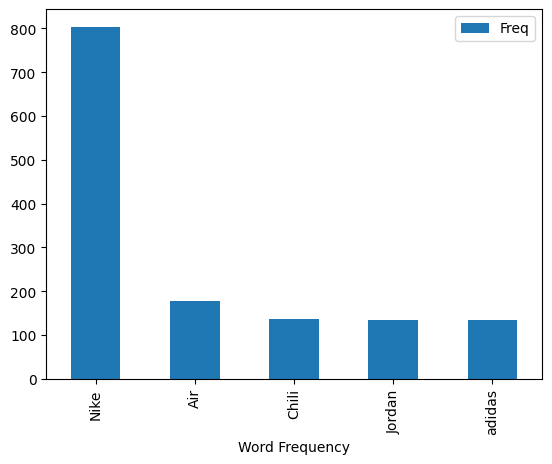

In [ ]:
c = Counter()
tweets['tokens'].map(c.update)
most_common = pd.DataFrame(c.most_common(5), columns=['Word Frequency','Freq'])
most_common.plot(kind='bar', x='Word Frequency', y='Freq')

In [ ]:
tweets


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,user_name,user_description,text,hashtags,source,clean_text,tokens
0,0,"Akan Thee Doll, Esq. 💜🇳🇬⚖️",Nigerian born in America | Six Foot Shawty | T...,Brett said he gon put Nike on the map! \n\n#Lo...,"['LoveisBlindS4', 'LoveIsBlindLIVE', 'LoveIsBl...",Twitter for iPhone,Brett said he gon put Nike on the map! #Loveis...,"[Brett, said, gon, put, Nike, map!, #LoveisBli..."
1,1,Woody Scott,NaN,Nike Air Max 90 LTR Big Kids’ Shoes https://t....,NaN,Twitter Web App,Nike Air Max 90 LTR Big Kids’ Shoes,"[Nike, Air, Max, 90, LTR, Big, Kids’, Shoes]"
2,2,BreakingNewzman,"Compiler of news, sports, & interesting stuff ...",Columbus Dispatch Letters to Editor: Jim Jorda...,NaN,Twitter for Android,Columbus Dispatch Letters to Editor: Jim Jorda...,"[Columbus, Dispatch, Letters, Editor:, Jim, Jo..."
3,3,Hannah Brandon,NaN,Nike Air Max 90 LTR Big Kids’ Shoes https://t....,NaN,Twitter Web App,Nike Air Max 90 LTR Big Kids’ Shoes,"[Nike, Air, Max, 90, LTR, Big, Kids’, Shoes]"
4,4,Imma neal rigga,GTAGOD,@mackjgke Word that look like Nike n adidas ha...,NaN,Twitter for iPhone,Word that look like Nike n adidas had a baby r...,"[Word, look, like, Nike, n, adidas, baby, real..."
...,...,...,...,...,...,...,...,...
1995,1995,florida man 🐊,"“you’re absolutely correct, enjoy”","*zooms in* yeah that’s Nike, just shoot it htt...",NaN,Twitter for iPhone,"*zooms in* yeah that’s Nike, just shoot it","[*zooms, in*, yeah, that’s, Nike,, shoot]"
1996,1996,winstonsmith1984,"all opinions are my own\n(not a bot, just anon...",@judyblume Love u Judy. Childhood hero. \n\nBi...,NaN,Twitter for Android,Love u Judy. Childhood hero. Biological man ad...,"[Love, u, Judy., Childhood, hero., Biological,..."
1997,1997,𝙎𝙃𝙊𝙀𝙈𝘼𝙉𝙄𝘼𝙌💫 ​,Release / News /\nSneaker Stores Affiliate \n#...,Ad: Restock: Air Jordan 1 Retro High OG Men's ...,NaN,Captain Sneakers by ShoemaniaQ,Ad: Restock: Air Jordan 1 Retro High OG Men's ...,"[Ad:, Restock:, Air, Jordan, 1, Retro, High, O..."
1998,1998,1Patriot Forever,"Conservative who wants the tuth, whatever and ...",@budlight So Glad so glad now take it away fro...,NaN,Twitter Web App,So Glad so glad now take it away from NIKE TOO...,"[So, Glad, glad, take, away, NIKE, TOO., Appar..."


# Generating Word Cloud

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


Text(0.5, 1.0, 'Word Cloud on Total Clean_text')

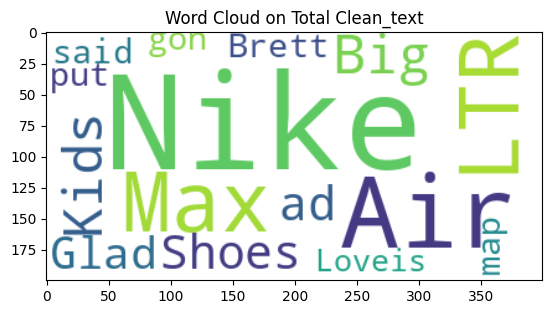

In [ ]:
sentence = str(tweets['clean_text'])
wc = WordCloud(max_words=15, stopwords=st.words('english') + ['I', 'The', "b'It", 'On', "a", "an", "the", "this", "that", "is", "it", "to", "and"], background_color='white')
wc.generate(sentence)
plt.imshow(wc, interpolation='bilinear')
plt.title('Word Cloud on Total Clean_text')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


Text(0.5, 1.0, 'Word Cloud on Total Counter Values')

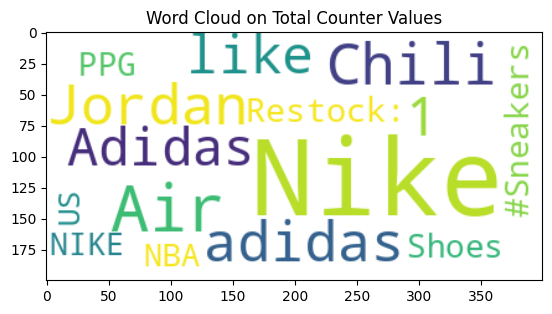

In [ ]:
wc = WordCloud(max_words=15, stopwords=st.words('english') + ['I', 'The', "b'It", 'On', "a", "an", "the", "this", "that", "is", "it", "to", "and"], background_color='white')
wc.generate_from_frequencies(c)
plt.imshow(wc,interpolation='bilinear')
plt.title('Word Cloud on Total Counter Values')

# LDA - Latent Dirichlet allocation

In [ ]:
!pip install pyLDAvis

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import necessary libraries
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel
import pickle
import json

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
tweets

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,user_name,user_description,text,hashtags,source,clean_text,tokens
0,0,"Akan Thee Doll, Esq. 💜🇳🇬⚖️",Nigerian born in America | Six Foot Shawty | T...,Brett said he gon put Nike on the map! \n\n#Lo...,"['LoveisBlindS4', 'LoveIsBlindLIVE', 'LoveIsBl...",Twitter for iPhone,Brett said he gon put Nike on the map! #Loveis...,"[Brett, said, gon, put, Nike, map!, #LoveisBli..."
1,1,Woody Scott,NaN,Nike Air Max 90 LTR Big Kids’ Shoes https://t....,NaN,Twitter Web App,Nike Air Max 90 LTR Big Kids’ Shoes,"[Nike, Air, Max, 90, LTR, Big, Kids’, Shoes]"
2,2,BreakingNewzman,"Compiler of news, sports, & interesting stuff ...",Columbus Dispatch Letters to Editor: Jim Jorda...,NaN,Twitter for Android,Columbus Dispatch Letters to Editor: Jim Jorda...,"[Columbus, Dispatch, Letters, Editor:, Jim, Jo..."
3,3,Hannah Brandon,NaN,Nike Air Max 90 LTR Big Kids’ Shoes https://t....,NaN,Twitter Web App,Nike Air Max 90 LTR Big Kids’ Shoes,"[Nike, Air, Max, 90, LTR, Big, Kids’, Shoes]"
4,4,Imma neal rigga,GTAGOD,@mackjgke Word that look like Nike n adidas ha...,NaN,Twitter for iPhone,Word that look like Nike n adidas had a baby r...,"[Word, look, like, Nike, n, adidas, baby, real..."
...,...,...,...,...,...,...,...,...
1995,1995,florida man 🐊,"“you’re absolutely correct, enjoy”","*zooms in* yeah that’s Nike, just shoot it htt...",NaN,Twitter for iPhone,"*zooms in* yeah that’s Nike, just shoot it","[*zooms, in*, yeah, that’s, Nike,, shoot]"
1996,1996,winstonsmith1984,"all opinions are my own\n(not a bot, just anon...",@judyblume Love u Judy. Childhood hero. \n\nBi...,NaN,Twitter for Android,Love u Judy. Childhood hero. Biological man ad...,"[Love, u, Judy., Childhood, hero., Biological,..."
1997,1997,𝙎𝙃𝙊𝙀𝙈𝘼𝙉𝙄𝘼𝙌💫 ​,Release / News /\nSneaker Stores Affiliate \n#...,Ad: Restock: Air Jordan 1 Retro High OG Men's ...,NaN,Captain Sneakers by ShoemaniaQ,Ad: Restock: Air Jordan 1 Retro High OG Men's ...,"[Ad:, Restock:, Air, Jordan, 1, Retro, High, O..."
1998,1998,1Patriot Forever,"Conservative who wants the tuth, whatever and ...",@budlight So Glad so glad now take it away fro...,NaN,Twitter Web App,So Glad so glad now take it away from NIKE TOO...,"[So, Glad, glad, take, away, NIKE, TOO., Appar..."


In [ ]:
# Get the sentence tokens and create the corpus
tokens = tweets['tokens']
corpus = [Dictionary(tokens).doc2bow(doc) for doc in tokens]

# Build the LDA Model
lda = LdaModel(corpus, num_topics=5, id2word=Dictionary(tokens))

# Print the top words for each topic
for topic, words in lda.show_topics(num_topics=5, formatted=False):
    print(f"Topic: {topic}")
    print(f'Top Words {topic}: {" ".join([word for word, _ in words])}')

# Evaluating the model using the coherence score
coherence_score = CoherenceModel(model=lda, texts=tokens, dictionary=Dictionary(tokens), coherence='c_v').get_coherence()
print(f'LDA Model Evaluation: Coherence score: {coherence_score}')

# Visualization of the topics
vis = gensimvis.prepare(topic_model=lda, 
                              corpus=corpus, 
                              dictionary=Dictionary(tokens))
pyLDAvis.display(vis)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic: 0
Top Words 0: Nike like adidas You Air got Adidas one Rp love
Topic: 1
Top Words 1: Nike Bud 1 #adidas #Nike Light like people US eBay
Topic: 2
Top Words 2: Nike Chili PPG Air NBA YouTube Leader: 1 adidas 26.1
Topic: 3
Top Words 3: Nike Adidas Restock: #Sneakers Air Jordan Shoes 🇳🇱: 🇫🇷: 🇮🇹:
Topic: 4
Top Words 4: Nike NIKE Why hate Budweiser women? adidas Jordan #Sneakers Restock:
LDA Model Evaluation: Coherence score: 0.4757387706165323


/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [ ]:
pyLDAvis.save_html(vis, 'lda_vis.html')
with open('lda_vis.pkl', 'wb') as f:
    pickle.dump(vis, f)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Non-negative Matrix-Factorization

In [ ]:
tweets

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,user_name,user_description,text,hashtags,source,clean_text,tokens
0,0,"Akan Thee Doll, Esq. 💜🇳🇬⚖️",Nigerian born in America | Six Foot Shawty | T...,Brett said he gon put Nike on the map! \n\n#Lo...,"['LoveisBlindS4', 'LoveIsBlindLIVE', 'LoveIsBl...",Twitter for iPhone,Brett said he gon put Nike on the map! #Loveis...,"[Brett, said, gon, put, Nike, map!, #LoveisBli..."
1,1,Woody Scott,NaN,Nike Air Max 90 LTR Big Kids’ Shoes https://t....,NaN,Twitter Web App,Nike Air Max 90 LTR Big Kids’ Shoes,"[Nike, Air, Max, 90, LTR, Big, Kids’, Shoes]"
2,2,BreakingNewzman,"Compiler of news, sports, & interesting stuff ...",Columbus Dispatch Letters to Editor: Jim Jorda...,NaN,Twitter for Android,Columbus Dispatch Letters to Editor: Jim Jorda...,"[Columbus, Dispatch, Letters, Editor:, Jim, Jo..."
3,3,Hannah Brandon,NaN,Nike Air Max 90 LTR Big Kids’ Shoes https://t....,NaN,Twitter Web App,Nike Air Max 90 LTR Big Kids’ Shoes,"[Nike, Air, Max, 90, LTR, Big, Kids’, Shoes]"
4,4,Imma neal rigga,GTAGOD,@mackjgke Word that look like Nike n adidas ha...,NaN,Twitter for iPhone,Word that look like Nike n adidas had a baby r...,"[Word, look, like, Nike, n, adidas, baby, real..."
...,...,...,...,...,...,...,...,...
1995,1995,florida man 🐊,"“you’re absolutely correct, enjoy”","*zooms in* yeah that’s Nike, just shoot it htt...",NaN,Twitter for iPhone,"*zooms in* yeah that’s Nike, just shoot it","[*zooms, in*, yeah, that’s, Nike,, shoot]"
1996,1996,winstonsmith1984,"all opinions are my own\n(not a bot, just anon...",@judyblume Love u Judy. Childhood hero. \n\nBi...,NaN,Twitter for Android,Love u Judy. Childhood hero. Biological man ad...,"[Love, u, Judy., Childhood, hero., Biological,..."
1997,1997,𝙎𝙃𝙊𝙀𝙈𝘼𝙉𝙄𝘼𝙌💫 ​,Release / News /\nSneaker Stores Affiliate \n#...,Ad: Restock: Air Jordan 1 Retro High OG Men's ...,NaN,Captain Sneakers by ShoemaniaQ,Ad: Restock: Air Jordan 1 Retro High OG Men's ...,"[Ad:, Restock:, Air, Jordan, 1, Retro, High, O..."
1998,1998,1Patriot Forever,"Conservative who wants the tuth, whatever and ...",@budlight So Glad so glad now take it away fro...,NaN,Twitter Web App,So Glad so glad now take it away from NIKE TOO...,"[So, Glad, glad, take, away, NIKE, TOO., Appar..."


In [ ]:
print(f"Number of tweets: {tweets.shape[0]}")

Number of tweets: 2000


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Add a few words to the stop words to avoid websites
from nltk.corpus import stopwords
stop_words = stopwords.words("english")+["http","https","www", "com" ,"RT", "@" , "kpop", "dick" , "ass", "cock", "balls" ]

# Convert a collection of raw documents to a matrix of TF-IDF features.
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words=stop_words, ngram_range=(1,2))
tm = tfidf.fit_transform(tweets["clean_text"])

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['rt'] not in stop_words.
  warnings.warn(


In [ ]:
# Non-Negative Matrix Factorization (NMF)
# Find two non-negative matrices (W, H) whose product 
# approximates the non- negative matrix X.
from sklearn.decomposition import NMF
nmf = NMF(n_components=10, random_state=0)

# fit the transfomed content with NMF
nmf.fit(tm)

# display the result
for index,topic in enumerate(nmf.components_):
    print(f"The top 20 words for topic # {index}")
    print([tfidf.get_feature_names_out()[i] for i in topic.argsort()[-20:]])
    print("\n")

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The top 20 words for topic # 0
['nike women', 'trans', 'say', 'pretty', 'team', 'democrats', 'republicans', 'sports', 'history', 'stop', 'get', 'beating', 'watch', 'nike', 'women', 'budweiser', 'budweiser nike', 'hate women', 'hate', 'nike hate']


The top 20 words for topic # 1
['bud', 'get', 'buy', 'time', 'also', 'good', 'boycott', 'made', 'lol', 'dunk low', 'wear', 'never', 'like nike', 'love', 'got', 'nike dunk', 'dunk', 'one', 'like', 'nike']


The top 20 words for topic # 2
['lakeshow', 'nba leader', 'rpg apg', 'apg', 'spicy', 'rpg', 'anthony', 'anthony chili', 'davis', 'chili davis', '26', '26 ppg', 'youtube', '227', '227 youtube', 'leader', 'youtube chili', 'nba', 'ppg', 'chili']


The top 20 words for topic # 3
['tempo shorts', 'tempo', 'shirt', 'men', 'size', 'nike dri', 'dri fit', 'dri', 'fit', 'shorts', 'closet nike', 'added', 'closet', 'listing added', 'poshmark closet', 'added poshmark', 'listing', 'check listing', 'poshmark', 'check']


The top 20 words for topic # 4
['

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


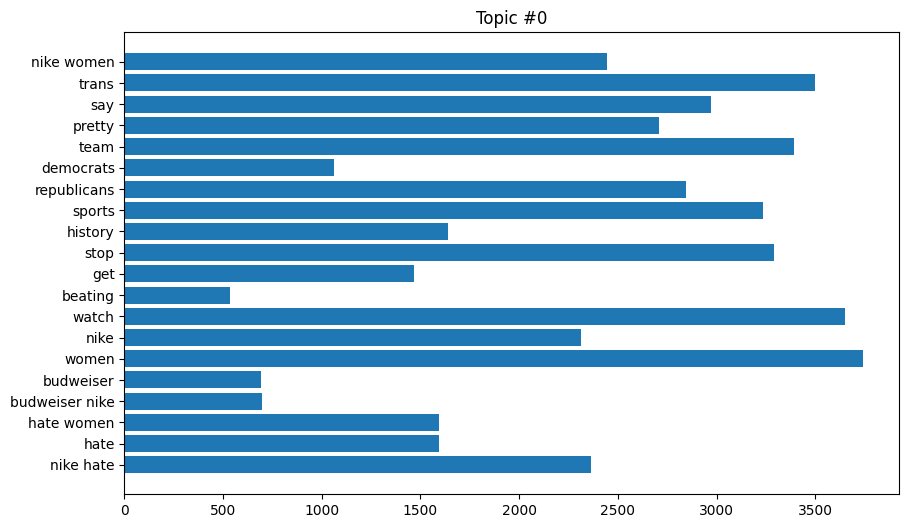

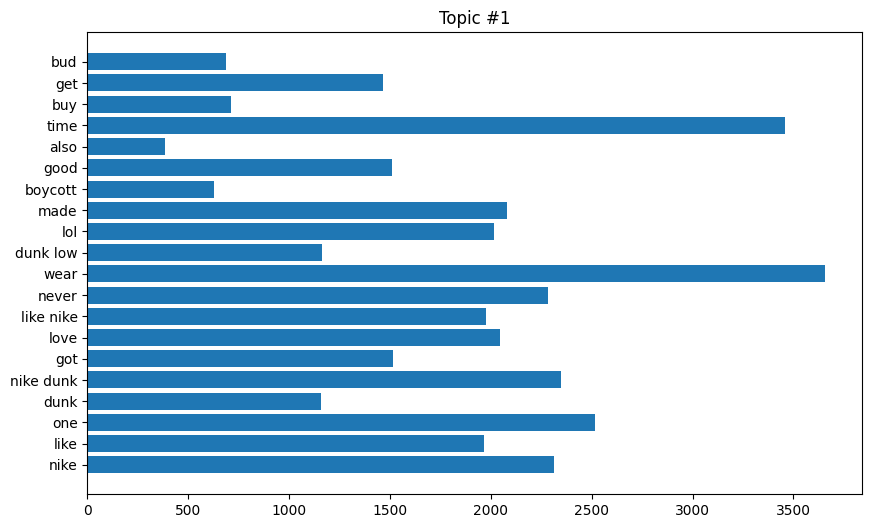

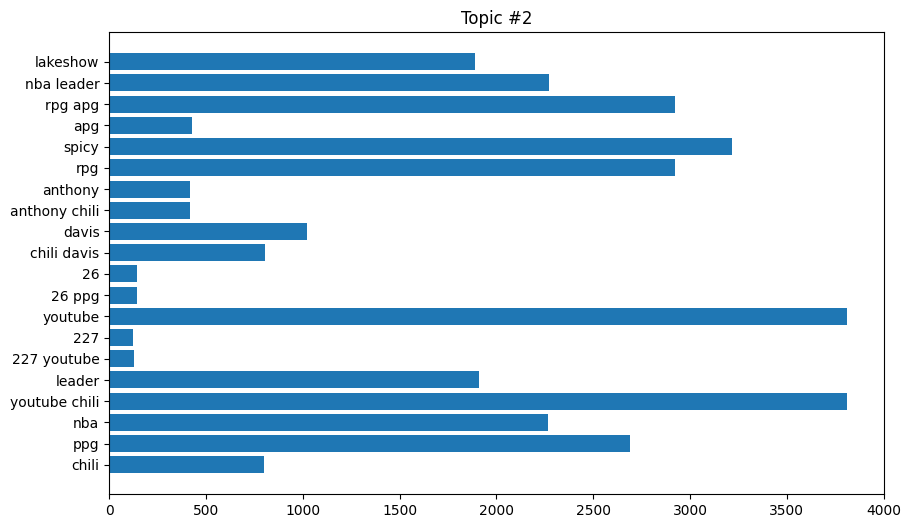

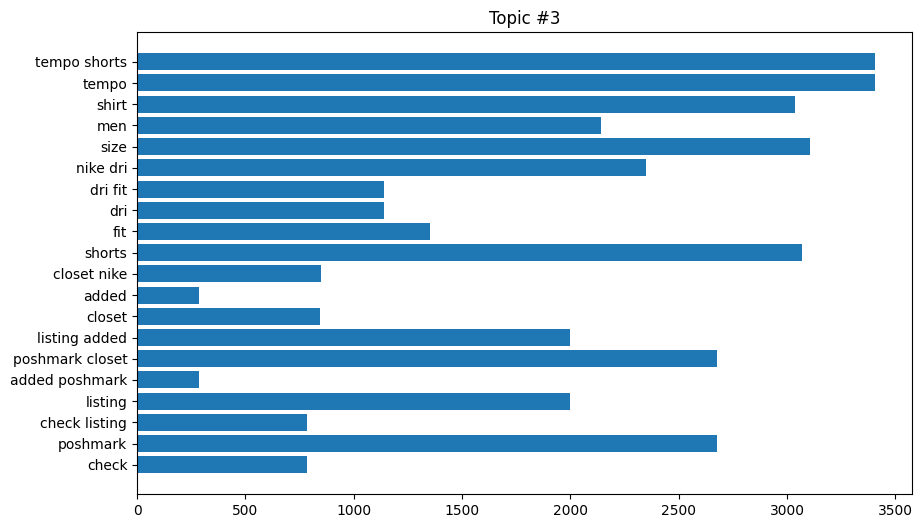

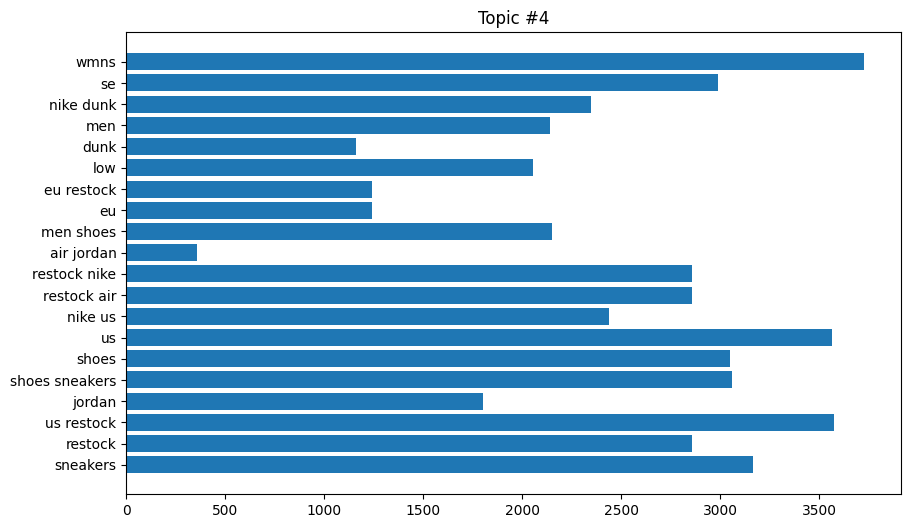

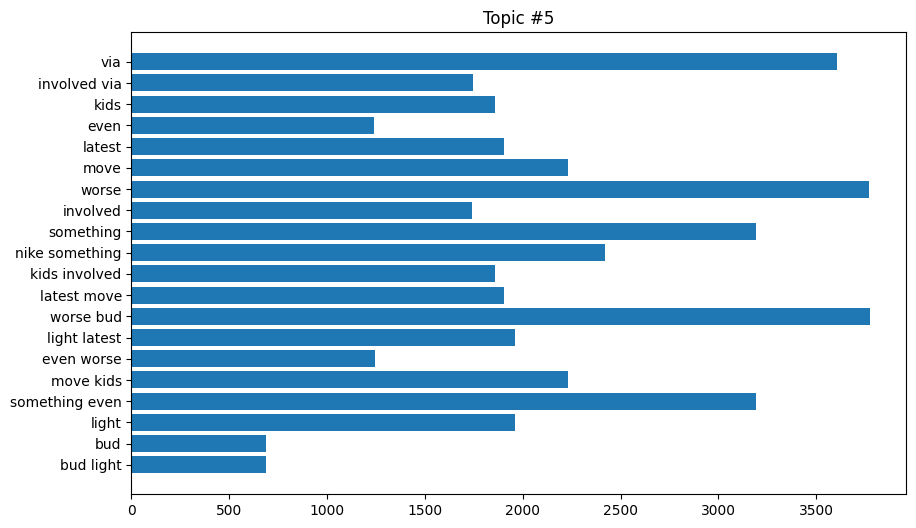

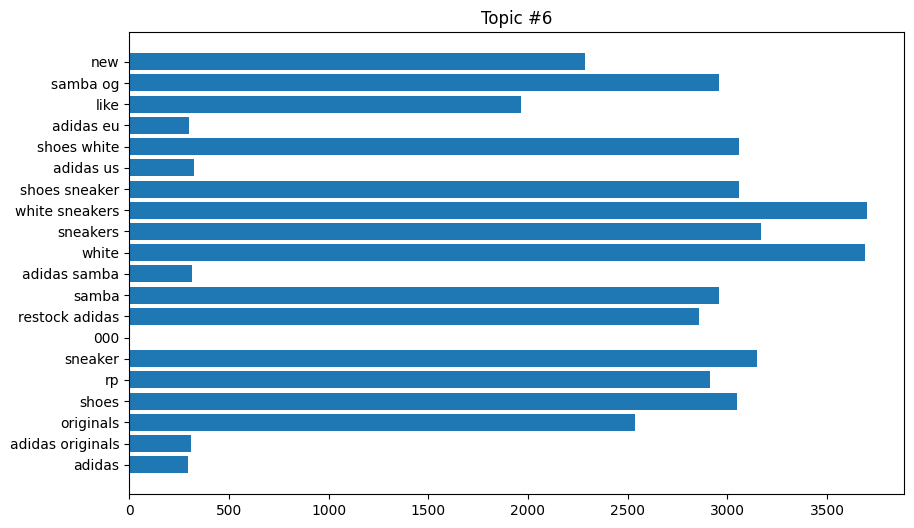

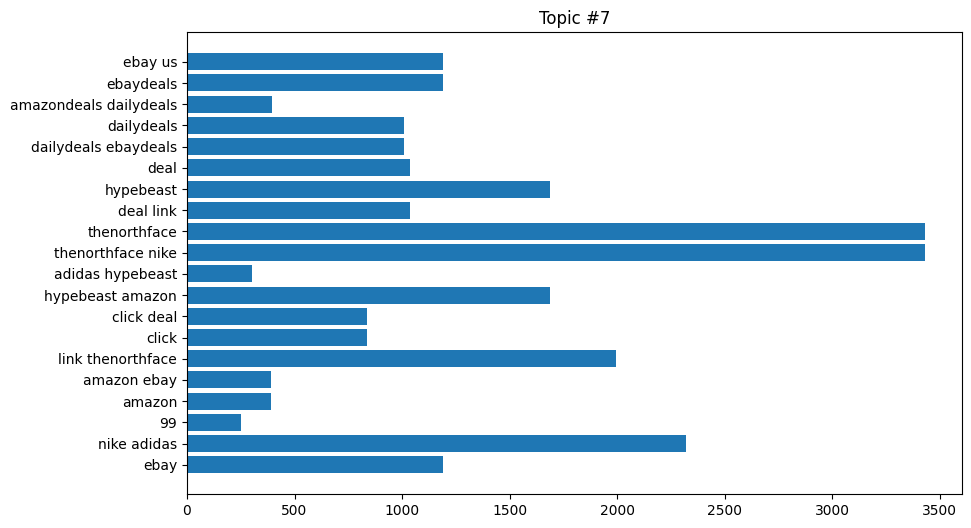

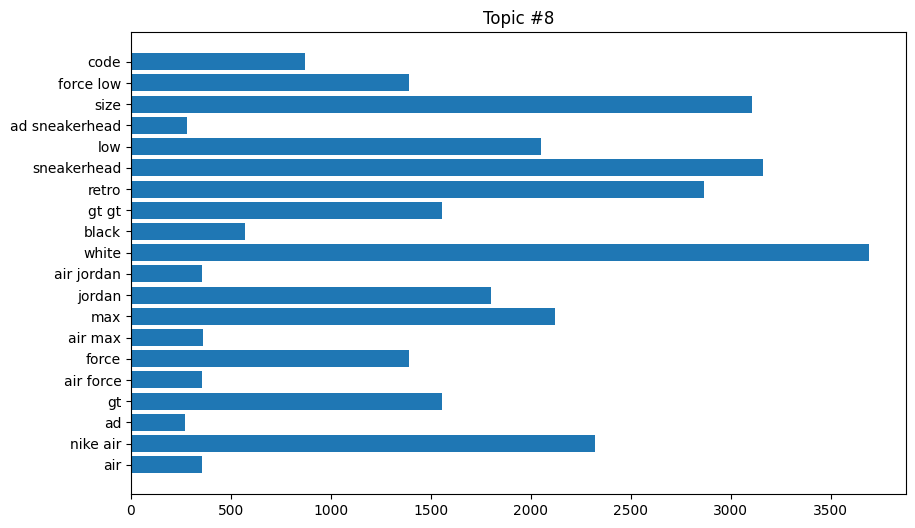

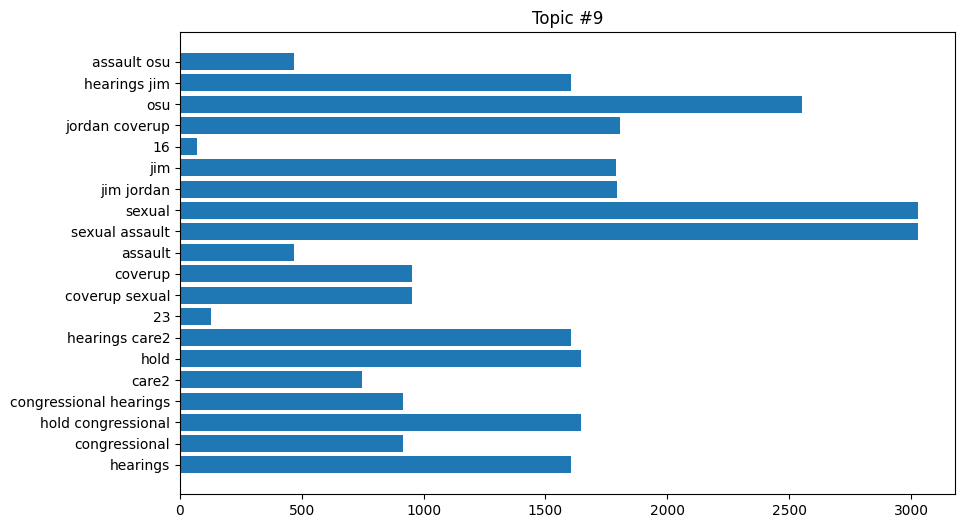

In [ ]:
import matplotlib.pyplot as plt

# loop through each topic
for index, topic in enumerate(nmf.components_):
    # get the top 20 words for the topic in descending order
    top_words = [tfidf.get_feature_names_out()[i] for i in topic.argsort()[::-1][:20]]
    # create a bar chart for the top words in descending order
    plt.figure(figsize=(10,6))
    plt.barh(range(len(top_words)), topic.argsort()[::-1][:20])
    plt.yticks(range(len(top_words)), top_words)
    plt.title(f'Topic #{index}')
    plt.show()
